In [136]:
import numpy as np 
from scipy.stats import randint
import pandas as pd 
import matplotlib.pyplot as plt 
import seaborn as sns
from sklearn.metrics import mean_absolute_error, mean_squared_error
import math

In [137]:
#from google.colab import drive
#drive.mount('/content/drive')

In [138]:
df = pd.read_csv('/content/drive/My Drive/household_power_consumption.txt', sep=';', 
                 parse_dates={'dt' : ['Date', 'Time']}, infer_datetime_format=True, 
                 low_memory=False, na_values=['nan','?'], index_col='dt')

In [139]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
dt,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0


In [140]:
df.info()

<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 2075259 entries, 2006-12-16 17:24:00 to 2010-11-26 21:02:00
Data columns (total 7 columns):
 #   Column                 Dtype  
---  ------                 -----  
 0   Global_active_power    float64
 1   Global_reactive_power  float64
 2   Voltage                float64
 3   Global_intensity       float64
 4   Sub_metering_1         float64
 5   Sub_metering_2         float64
 6   Sub_metering_3         float64
dtypes: float64(7)
memory usage: 126.7 MB


In [141]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [142]:
df.shape

(2075259, 7)

### Dealing with missing values  'nan' with a test statistic

In [143]:
## finding all columns that have nan:

droping_list_all=[]
for j in range(0,7):
    if not df.iloc[:, j].notnull().all():
        droping_list_all.append(j)        
        #print(df.iloc[:,j].unique())
droping_list_all

[0, 1, 2, 3, 4, 5, 6]

In [144]:
# filling nan with forward fill

for j in range(0,7):        
        df.iloc[:,j]=df.iloc[:,j].fillna(df.mean())

In [145]:
df.isnull().sum()

Global_active_power      25979
Global_reactive_power    25979
Voltage                  25979
Global_intensity         25979
Sub_metering_1           25979
Sub_metering_2           25979
Sub_metering_3           25979
dtype: int64

In [146]:
df['Sub_metering_4'] = (df['Global_active_power']* 1000/60) - df['Sub_metering_1'] - df['Sub_metering_2'] - df['Sub_metering_3']

In [147]:
df.head()

,Global_active_power,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
dt,,,,,,,,
2006-12-16 17:24:00,4.216,0.418,234.84,18.4,0.0,1.0,17.0,52.266667
2006-12-16 17:25:00,5.360,0.436,233.63,23.0,0.0,1.0,16.0,72.333333
2006-12-16 17:26:00,5.374,0.498,233.29,23.0,0.0,2.0,17.0,70.566667
2006-12-16 17:27:00,5.388,0.502,233.74,23.0,0.0,1.0,17.0,71.800000
2006-12-16 17:28:00,3.666,0.528,235.68,15.8,0.0,1.0,17.0,43.100000


In [148]:
df_daily = df.resample('D').sum()

In [149]:
df_daily.shape

(1442, 8)

In [150]:
d=df_daily.reset_index()

In [151]:
d = d.rename(columns= {'dt': 'ds', 'Global_active_power':'y'})
d.head()

,ds,y,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3,Sub_metering_4
0,2006-12-16,1209.176,34.922,93552.53,5180.8,0.0,546.0,4926.0,14680.933333
1,2006-12-17,3390.460,226.006,345725.32,14398.6,2033.0,4187.0,13341.0,36946.666667
2,2006-12-18,2203.826,161.792,347373.64,9247.2,1063.0,2621.0,14018.0,19028.433333
3,2006-12-19,1666.194,150.942,348479.01,7094.0,839.0,7602.0,6197.0,13131.900000
4,2006-12-20,2225.748,160.998,348923.61,9313.0,0.0,2648.0,14063.0,20384.800000


**Univariate:**

In [152]:
train1 = d[(d['ds']>='2006-12-16') & (d['ds']<='2009-11-26')]
test1 = d[(d['ds']>'2009-11-26')]

In [153]:
train1.shape

(1077, 9)

In [154]:
test1.shape

(365, 9)

In [155]:
from fbprophet import Prophet

In [156]:
train1 = d[(d['ds']>='2006-12-16') & (d['ds']<='2009-11-26')]
test1 = d[(d['ds']>'2009-11-26')]

In [157]:
train1.shape

(1077, 9)

In [158]:
test1.shape

(365, 9)

In [159]:
from fbprophet import Prophet

In [160]:
model1 = Prophet()

In [161]:
model = Prophet()

In [162]:
model1.fit(train1)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [163]:
future1 = model1.make_future_dataframe(periods=365)

In [164]:
forecast1 = model1.predict(test1)

In [165]:
forecast1[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2009-11-27,2094.127236,1538.320067,2690.781883
1,2009-11-28,2375.438023,1816.550486,3017.572205
2,2009-11-29,2347.200063,1780.265829,2942.757240
3,2009-11-30,1958.389137,1398.239175,2520.829967
4,2009-12-01,2087.380242,1492.302798,2650.967193
...,...,...,...,...
360,2010-11-22,2008.177595,1466.673799,2583.526316
361,2010-11-23,2158.501330,1547.224079,2710.131611
362,2010-11-24,2167.889515,1541.574257,2753.252659
363,2010-11-25,1993.666055,1417.603901,2587.294140


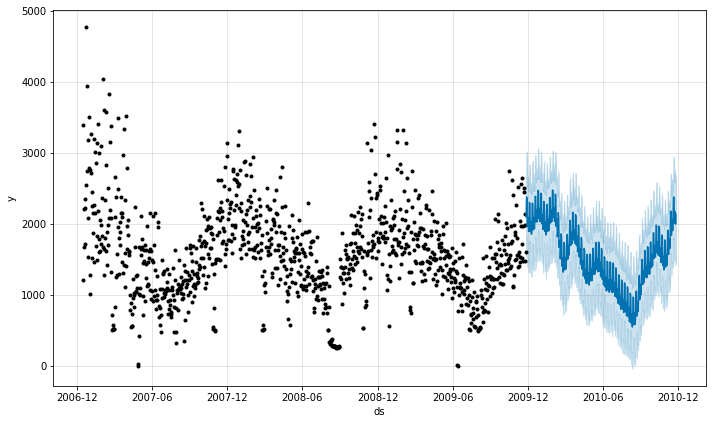

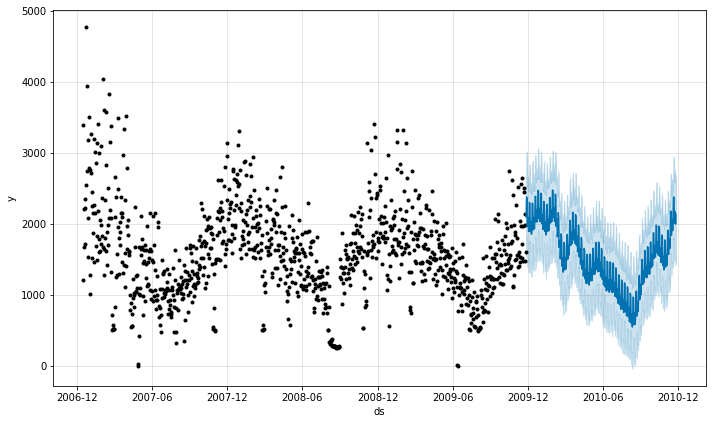

In [166]:
model1.plot(forecast1)

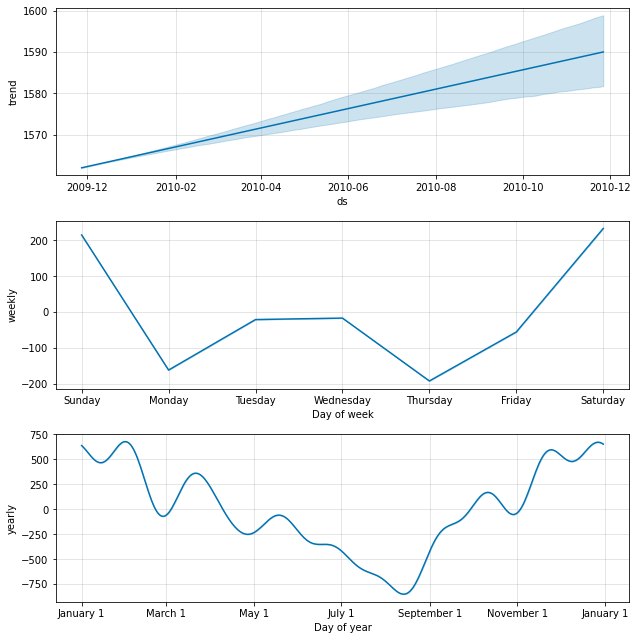

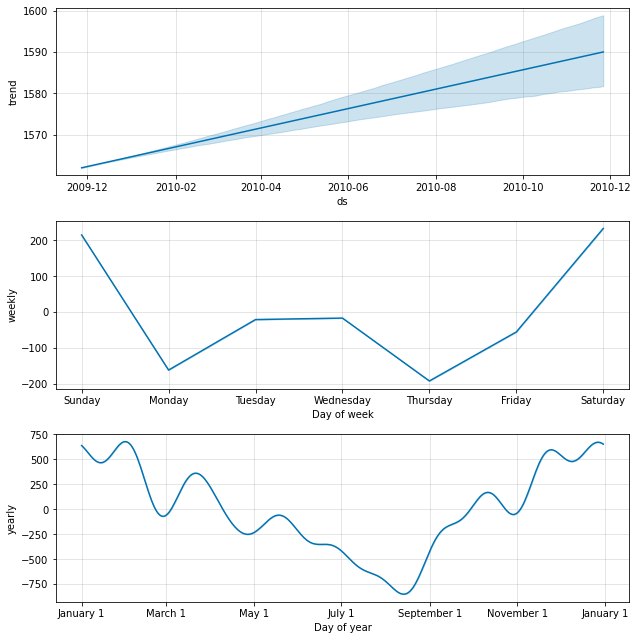

In [167]:
model1.plot_components(forecast1)

In [168]:
# calculate MAE between expected and predicted values for december
y_true = d['y'][-365:].values
y_pred = forecast2['yhat'].values
mae = mean_absolute_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 312.261


In [169]:
# calculate MSE between expected and predicted values for december
y_true = d['y'][-365:].values
y_pred = forecast2['yhat'].values
mse = mean_squared_error(y_true, y_pred)
print('MAE: %.3f' % mae)

MAE: 312.261


In [195]:
# calculate MAPE between expected and predicted values for december
y_true = d['y'][-365:].values
y_pred = forecast2['yhat'].values
mape = np.mean(np.abs((y_true - y_pred /y_true))) *100
print('MAPE: %.3f' % mae)

MAPE: 312.261


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:4: RuntimeWarning:

divide by zero encountered in true_divide



Multivariate:

In [170]:
train = d[(d['ds']>='2006-12-16') & (d['ds']<='2009-11-26')]
test = d[(d['ds']>'2009-11-26')]

In [198]:
train.shape

(1077, 9)

In [199]:
test.shape

(365, 9)

In [171]:
model.add_regressor('Global_reactive_power')
model.add_regressor('Voltage')
model.add_regressor('Global_intensity')
model.add_regressor('Sub_metering_1')
model.add_regressor('Sub_metering_2')
model.add_regressor('Sub_metering_3')

In [172]:
model.fit(train)

INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


In [173]:
#model.params

In [174]:
future = model.make_future_dataframe(periods=365)

In [175]:
future

,ds
0,2006-12-16
1,2006-12-17
2,2006-12-18
3,2006-12-19
4,2006-12-20
...,...
1437,2010-11-22
1438,2010-11-23
1439,2010-11-24
1440,2010-11-25


In [176]:
future['Global_reactive_power'] = d['Global_reactive_power']

In [177]:
future['Voltage'] = d['Voltage']

In [178]:
future['Global_intensity'] = d['Global_intensity']

In [179]:
future['Sub_metering_1'] = d['Sub_metering_1']

In [180]:
future['Sub_metering_2'] = d['Sub_metering_2']

In [181]:
future['Sub_metering_3'] = d['Sub_metering_3']

In [182]:
future

,ds,Global_reactive_power,Voltage,Global_intensity,Sub_metering_1,Sub_metering_2,Sub_metering_3
0,2006-12-16,34.922,93552.53,5180.8,0.0,546.0,4926.0
1,2006-12-17,226.006,345725.32,14398.6,2033.0,4187.0,13341.0
2,2006-12-18,161.792,347373.64,9247.2,1063.0,2621.0,14018.0
3,2006-12-19,150.942,348479.01,7094.0,839.0,7602.0,6197.0
4,2006-12-20,160.998,348923.61,9313.0,0.0,2648.0,14063.0
...,...,...,...,...,...,...,...
1437,2010-11-22,142.354,345883.85,8660.4,4855.0,2110.0,10136.0
1438,2010-11-23,137.450,346428.76,6731.2,1871.0,458.0,7611.0
1439,2010-11-24,132.460,345644.59,7559.4,1096.0,2848.0,12224.0
1440,2010-11-25,116.128,347812.21,6004.0,1076.0,426.0,5072.0


In [204]:
forecast = model.predict(future)

In [205]:
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']]

,ds,yhat,yhat_lower,yhat_upper
0,2006-12-16,1242.506021,1226.549735,1258.062592
1,2006-12-17,3409.688731,3394.087330,3425.968491
2,2006-12-18,2197.444284,2180.446236,2212.825459
3,2006-12-19,1672.835172,1656.808184,1689.019929
4,2006-12-20,2217.757110,2201.518552,2235.586353
...,...,...,...,...
1437,2010-11-22,2116.043199,1830.031388,2415.802080
1438,2010-11-23,1657.862695,1377.873737,1959.955853
1439,2010-11-24,1865.309780,1586.445710,2171.188541
1440,2010-11-25,1487.645769,1199.457227,1789.667638


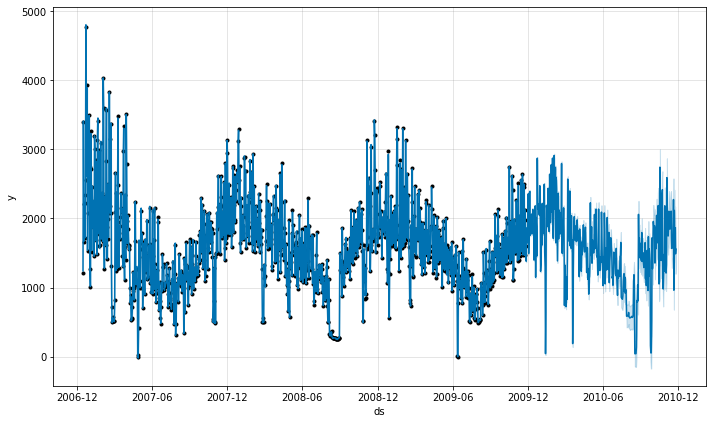

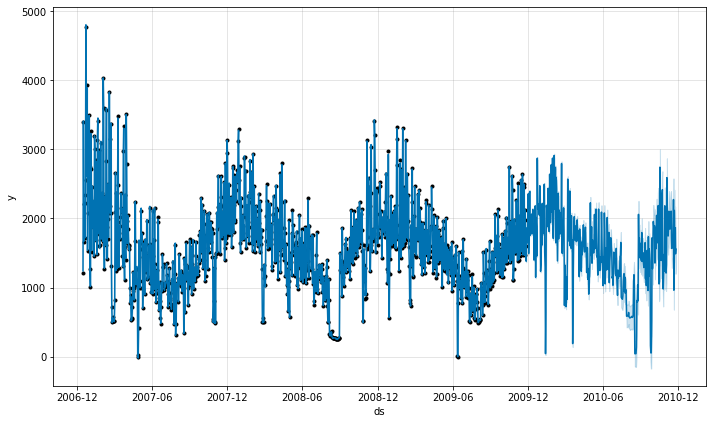

In [206]:
model.plot(forecast)

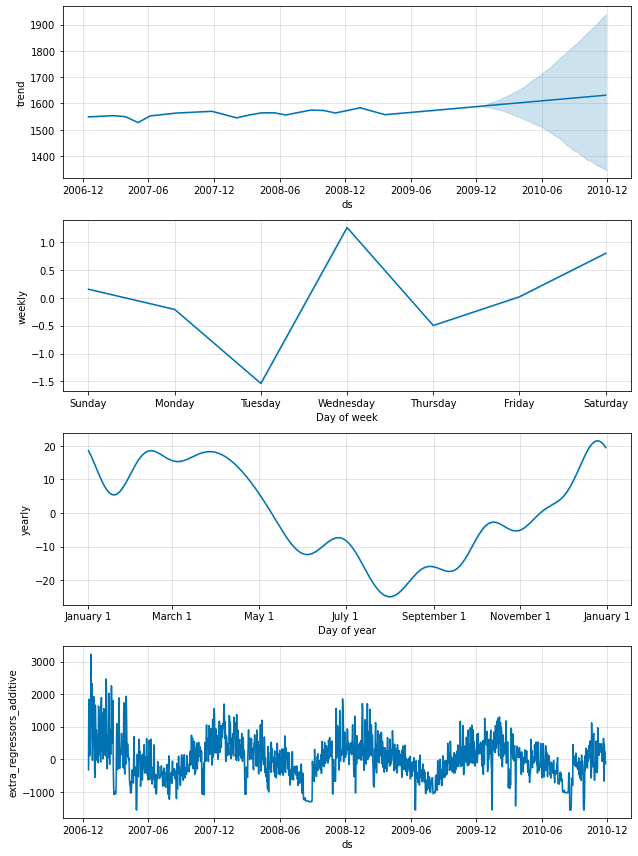

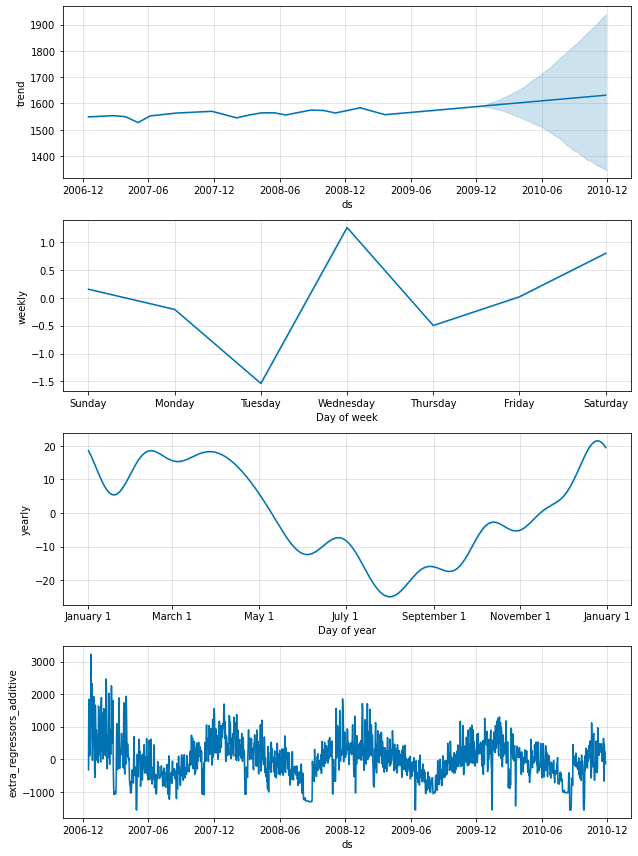

In [207]:
model.plot_components(forecast)

In [196]:
forecast1

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,additive_terms,additive_terms_lower,additive_terms_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1561.940539,1538.320067,2690.781883,1561.940539,1561.940539,532.186697,532.186697,532.186697,-55.750299,-55.750299,-55.750299,587.936996,587.936996,587.936996,0.0,0.0,0.0,2094.127236
1,2009-11-28,1562.017720,1816.550486,3017.572205,1562.017720,1562.017720,813.420303,813.420303,813.420303,233.549961,233.549961,233.549961,579.870342,579.870342,579.870342,0.0,0.0,0.0,2375.438023
2,2009-11-29,1562.094901,1780.265829,2942.757240,1562.094901,1562.094901,785.105163,785.105163,785.105163,215.239818,215.239818,215.239818,569.865345,569.865345,569.865345,0.0,0.0,0.0,2347.200063
3,2009-11-30,1562.172081,1398.239175,2520.829967,1562.172081,1562.172081,396.217056,396.217056,396.217056,-162.247135,-162.247135,-162.247135,558.464190,558.464190,558.464190,0.0,0.0,0.0,1958.389137
4,2009-12-01,1562.249262,1492.302798,2650.967193,1562.249262,1562.249262,525.130980,525.130980,525.130980,-21.096323,-21.096323,-21.096323,546.227303,546.227303,546.227303,0.0,0.0,0.0,2087.380242
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2010-11-22,1589.725592,1466.673799,2583.526316,1581.531200,1598.525639,418.452003,418.452003,418.452003,-162.247135,-162.247135,-162.247135,580.699138,580.699138,580.699138,0.0,0.0,0.0,2008.177595
361,2010-11-23,1589.802772,1547.224079,2710.131611,1581.573213,1598.627264,568.698558,568.698558,568.698558,-21.096323,-21.096323,-21.096323,589.794881,589.794881,589.794881,0.0,0.0,0.0,2158.501330
362,2010-11-24,1589.879953,1541.574257,2753.252659,1581.619915,1598.728890,578.009562,578.009562,578.009562,-16.960419,-16.960419,-16.960419,594.969981,594.969981,594.969981,0.0,0.0,0.0,2167.889515
363,2010-11-25,1589.957134,1417.603901,2587.294140,1581.687637,1598.830916,403.708921,403.708921,403.708921,-192.735604,-192.735604,-192.735604,596.444525,596.444525,596.444525,0.0,0.0,0.0,1993.666055


In [202]:
forecast

,ds,trend,yhat_lower,yhat_upper,trend_lower,trend_upper,Global_intensity,Global_intensity_lower,Global_intensity_upper,Global_reactive_power,Global_reactive_power_lower,Global_reactive_power_upper,Sub_metering_1,Sub_metering_1_lower,Sub_metering_1_upper,Sub_metering_2,Sub_metering_2_lower,Sub_metering_2_upper,Sub_metering_3,Sub_metering_3_lower,Sub_metering_3_upper,Voltage,Voltage_lower,Voltage_upper,additive_terms,additive_terms_lower,additive_terms_upper,extra_regressors_additive,extra_regressors_additive_lower,extra_regressors_additive_upper,weekly,weekly_lower,weekly_upper,yearly,yearly_lower,yearly_upper,multiplicative_terms,multiplicative_terms_lower,multiplicative_terms_upper,yhat
0,2009-11-27,1587.736836,1364.964761,1396.774334,1587.736836,1587.736836,-223.697979,-223.697979,-223.697979,7.078134,7.078134,7.078134,2.238800,2.238800,2.238800,0.816124,0.816124,0.816124,3.862095,3.862095,3.862095,-0.042109,-0.042109,-0.042109,-206.361419,-206.361419,-206.361419,-209.744934,-209.744934,-209.744934,0.019831,0.019831,0.019831,3.363683,3.363683,3.363683,0.0,0.0,0.0,1381.375417
1,2009-11-28,1587.856826,1845.788175,1877.242156,1587.856826,1587.856826,271.849420,271.849420,271.849420,-8.698244,-8.698244,-8.698244,-2.084132,-2.084132,-2.084132,0.821378,0.821378,0.821378,7.676267,7.676267,7.676267,-0.038130,-0.038130,-0.038130,273.996708,273.996708,273.996708,269.526559,269.526559,269.526559,0.800130,0.800130,0.800130,3.670019,3.670019,3.670019,0.0,0.0,0.0,1861.853534
2,2009-11-29,1587.976816,1626.254888,1660.261512,1587.976816,1587.976816,55.988135,55.988135,55.988135,-2.850615,-2.850615,-2.850615,0.788814,0.788814,0.788814,-0.584075,-0.584075,-0.584075,-1.366273,-1.366273,-1.366273,-0.064096,-0.064096,-0.064096,56.078884,56.078884,56.078884,51.911890,51.911890,51.911890,0.155818,0.155818,0.155818,4.011176,4.011176,4.011176,0.0,0.0,0.0,1644.055699
3,2009-11-30,1588.096805,1726.322181,1760.244306,1588.096805,1588.096805,140.246434,140.246434,140.246434,3.598176,3.598176,3.598176,0.779355,0.779355,0.779355,0.834513,0.834513,0.834513,4.472141,4.472141,4.472141,-0.071005,-0.071005,-0.071005,154.046104,154.046104,154.046104,149.859614,149.859614,149.859614,-0.207098,-0.207098,-0.207098,4.393587,4.393587,4.393587,0.0,0.0,0.0,1742.142909
4,2009-12-01,1588.216795,1745.684738,1778.479017,1588.216795,1588.216795,159.441513,159.441513,159.441513,5.568041,5.568041,5.568041,2.238800,2.238800,2.238800,0.838191,0.838191,0.838191,2.783424,2.783424,2.783424,-0.053851,-0.053851,-0.053851,174.101831,174.101831,174.101831,170.816118,170.816118,170.816118,-1.537229,-1.537229,-1.537229,4.822942,4.822942,4.822942,0.0,0.0,0.0,1762.318627
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,2010-11-22,1630.933171,1807.003480,2384.409696,1325.745954,1899.143711,480.375613,480.375613,480.375613,5.485878,5.485878,5.485878,-4.321948,-4.321948,-4.321948,-0.084417,-0.084417,-0.084417,1.833694,1.833694,1.833694,-0.016909,-0.016909,-0.016909,485.110029,485.110029,485.110029,483.271910,483.271910,483.271910,-0.207098,-0.207098,-0.207098,2.045217,2.045217,2.045217,0.0,0.0,0.0,2116.043199
361,2010-11-23,1631.053160,1352.438076,1928.916458,1325.227806,1900.735652,20.932110,20.932110,20.932110,6.325313,6.325313,6.325313,-0.289554,-0.289554,-0.289554,0.783549,0.783549,0.783549,-1.667136,-1.667136,-1.667136,-0.022648,-0.022648,-0.022648,26.809535,26.809535,26.809535,26.061633,26.061633,26.061633,-1.537229,-1.537229,-1.537229,2.285130,2.285130,2.285130,0.0,0.0,0.0,1657.862695
362,2010-11-24,1631.173150,1550.758833,2139.511472,1324.062388,1902.382614,218.169881,218.169881,218.169881,7.179469,7.179469,7.179469,0.757733,0.757733,0.757733,-0.472164,-0.472164,-0.472164,4.728638,4.728638,4.728638,-0.014390,-0.014390,-0.014390,234.136630,234.136630,234.136630,230.349167,230.349167,230.349167,1.264511,1.264511,1.264511,2.522952,2.522952,2.522952,0.0,0.0,0.0,1865.309

In [209]:
# calculate MAE between expected and predicted values for december
y_true1 = d['y'][-1442:].values
y_pred1 = forecast['yhat'].values
rmse = math.sqrt(mean_squared_error(y_true1, y_pred1))
print('rmse: %.3f' % mae)

rmse: 312.261


In [210]:
from fbprophet.diagnostics import cross_validation, performance_metrics
cv_results = cross_validation(model,horizon="100 days",period='365 days',initial='365 days')
df_p = performance_metrics(cv_results)
df_p

INFO:fbprophet:Making 2 forecasts with cutoffs between 2008-08-18 00:00:00 and 2009-08-18 00:00:00


,horizon,mse,rmse,mae,mape,mdape,coverage
0,10 days,149.921341,12.244237,11.000741,0.028299,0.030034,0.85
1,11 days,150.355952,12.261972,10.979569,0.029040,0.030965,0.80
2,12 days,140.418478,11.849830,10.348110,0.028673,0.029499,0.85
3,13 days,157.942415,12.567514,11.172441,0.027729,0.017903,0.80
4,14 days,167.817724,12.954448,11.456500,0.026351,0.016439,0.80
...,...,...,...,...,...,...,...
86,96 days,1687.716971,41.081833,35.332536,0.019511,0.016928,0.60
87,97 days,1770.994351,42.083184,36.367180,0.018848,0.016931,0.60
88,98 days,1662.676348,40.775929,34.766005,0.017682,0.015968,0.65
89,99 days,1376.815093,37.105459,31.782175,0.016754,0.014814,0.70
